# IMEC2201 Herramientas Computacionales 
## Taller Semana 8: Transformada Rápida de Fourier (FFT)
### Fecha Límite Entrega (Bloque Neón): <font color="#FF5733">23.59h de Junio 5, 2022</font>

Universidad de los Andes — Mayo 25, 2022.
___
### Tener en Cuenta
La entrega del Taller 8 se puede realizar de tres maneras:
1. Cargar la solución en su repositorio en GitHub y enviar el enlace del mismo vía Bloque Neón.
2. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión '.ipynb').
3. Enviar vía Bloque Neón el archivo PDF del Jupyter Notebook.
___


# Semana 8: Transformación de Fourier y Procesamiento de Señales

En diferentes disciplinas, es importante conocer la manera de disminuir el ruido a la hora de procesar diferentes tipos de señales. Desde la oscilación de un péndulo, hasta el latido de un corazón. 

Para este taller usaremos de nuevo el DataFrame usado en la semana pasada, para saber si se podría mejorar el procedimiento de integración numérica, con el fin de analizar el comportamiento sobre los 3 ejes. 

In [1]:
# Importar librerías
using DifferentialEquations
using DataFrames
using Plots
using FFTW
using XLSX
using CSV
using WAV
using DSP

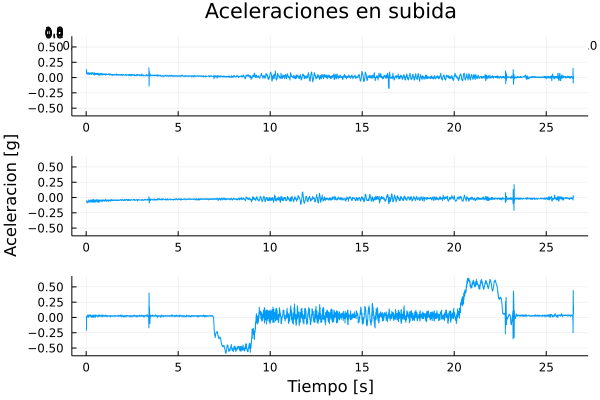

In [2]:
# Datos
df_up = DataFrame(CSV.File("./data/subida.csv"))
df_down= DataFrame(CSV.File("./data/bajada.csv"));
# De nuevo, grafiquemos las aceleraciones en los ejes
ax_u = plot(df_up.time,df_up.ax, legend = false)
ay_u = plot(df_up.time,df_up.ay, legend = false, ylabel = "Aceleracion [g]")
az_u = plot(df_up.time,df_up.az, legend = false, xlabel = "Tiempo [s]")
title = plot(title = "Aceleraciones en subida", grid = false, showaxis = false, bottom_margin = -50Plots.px, xlabel = "Tiempo [s]")
plot(title, ax_u, ay_u,az_u, layout = @layout([A{0.01h}; [B;C;D]]), link = :all)

Como se puede notar, vemos que hay mucho ruido en la señal. Se podría simplificar el proceso usando la transformación de Fourier. 

In [3]:
# Parámetros de la transformación

# Periodo
T = 18 # ms

# Cantidad de datos
N = length(eachrow(df_up))

# Frecuencia de muestreo
function frec_muestreo(T)
    return 1/T
end

Δf = frec_muestreo(T) # Hz

# Frecuencia Circular
function freq_circular(T)
    return 2*π / (T/1000)
end

ω = freq_circular(T) # rad/s

349.0658503988659

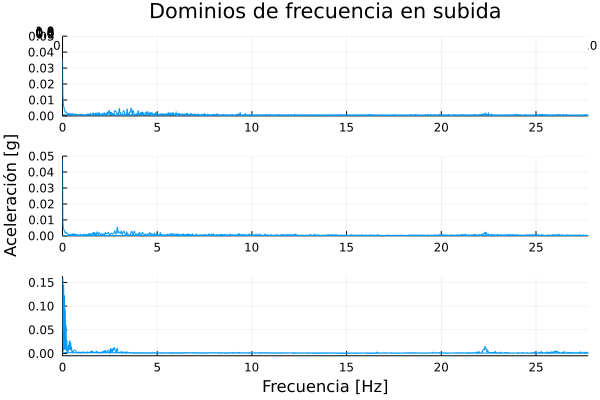

In [4]:
# Señal y frecuencia de muestreo
import FFTW:fftfreq

acc = [df_up.ax, df_up.ay, df_up.az]

ax, ay, az = [convert(Array{Float64,1}, i) for i in acc]

ffx, ffy, ffz = [fft(i) for i in [ax,ay,az]]

freqs = fftfreq(N, Δf).* 1000

A_x, A_y, A_z = [(2/N).*abs.(i) for i in [ffx, ffy, ffz]] # series y sucesiones

fr_x = plot(freqs,A_x, xlim=(0, max(freqs...)), legend = false, ylims = (0,0.05))
fr_y = plot(freqs,A_y, xlim=(0, max(freqs...)), legend = false, ylims = (0,0.05), ylabel = "Aceleración [g]")
fr_z = plot(freqs,A_z, xlim=(0, max(freqs...)), legend = false, xlabel = "Frecuencia [Hz]")
title = plot(title = "Dominios de frecuencia en subida", grid = false, showaxis = false, bottom_margin = -50Plots.px, xlabel = "Tiempo [s]")
plot(title, fr_x, fr_y, fr_z, layout = @layout([A{0.01h}; [B;C;D]]), link = :all)

# Taller

Para esta semana, encontrar el dominio de frecuencia de los datos de bajada, representandolos en un subplot de 3x1. 